___

<a href='https://www.udemy.com/user/joseportilla/'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Support Vector Machines 
## Exercise

## [Fraud in Wine](https://en.wikipedia.org/wiki/Wine_fraud)

Wine fraud relates to the commercial aspects of wine. The most prevalent type of fraud is one where wines are adulterated, usually with the addition of cheaper products (e.g. juices) and sometimes with harmful chemicals and sweeteners (compensating for color or flavor).

Counterfeiting and the relabelling of inferior and cheaper wines to more expensive brands is another common type of wine fraud.

<img src="wine.jpg">

## Project Goals

A distribution company that was recently a victim of fraud has completed an audit of various samples of wine through the use of chemical analysis on samples. The distribution company specializes in exporting extremely high quality, expensive wines, but was defrauded by a supplier who was attempting to pass off cheap, low quality wine as higher grade wine. The distribution company has hired you to attempt to create a machine learning model that can help detect low quality (a.k.a "fraud") wine samples. They want to know if it is even possible to detect such a difference.


Data Source: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**TASK: Your overall goal is to use the wine dataset shown below to develop a machine learning model that attempts to predict if a wine is "Legit" or "Fraud" based on various chemical features. Complete the tasks below to follow along with the project.**

---
---

## Complete the Tasks in bold

**TASK: Run the cells below to import the libraries and load the dataset.**

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("wine_fraud.csv")

In [29]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


**TASK: What are the unique variables in the target column we are trying to predict (quality)?**

In [30]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [31]:
df.isna().sum().sum()

0

In [32]:
df.quality.unique()

array(['Legit', 'Fraud'], dtype=object)

**TASK: Create a countplot that displays the count per category of Legit vs Fraud. Is the label/target balanced or unbalanced?**

In [33]:
df.quality.value_counts()

Legit    6251
Fraud     246
Name: quality, dtype: int64

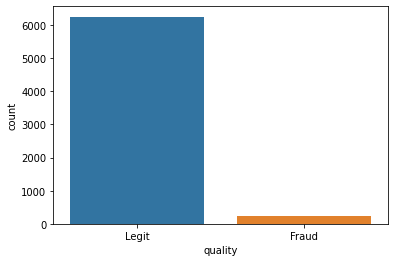

In [34]:
sns.countplot(data=df, x='quality')

**TASK: Let's find out if there is a difference between red and white wine when it comes to fraud. Create a countplot that has the wine *type* on the x axis with the hue separating columns by Fraud vs Legit.**

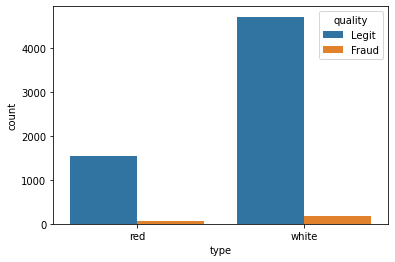

In [35]:
sns.countplot(data=df, x='type', hue='quality')

**TASK: What percentage of red wines are Fraud? What percentage of white wines are fraud?**

In [36]:
#red
100 * len(df[(df.type == 'red') & (df.quality == 'Fraud')]) / len(df[df.type == 'red'])

3.9399624765478425

In [37]:
#white
100 * len(df[(df.type == 'white') & (df.quality == 'Fraud')]) / len(df[df.type == 'white'])

3.736218864842793

**TASK: Calculate the correlation between the various features and the "quality" column. To do this you may need to map the column to 0 and 1 instead of a string.**

In [38]:
from sklearn.preprocessing import LabelEncoder

quality_label_encoder = LabelEncoder() 
df['quality'] = quality_label_encoder.fit_transform(df['type'])

In [39]:
corr_quality = df.corr()['quality'].drop('quality').abs()
corr_quality

fixed acidity           0.486740
volatile acidity        0.653036
citric acid             0.187397
residual sugar          0.348821
chlorides               0.512678
free sulfur dioxide     0.471644
total sulfur dioxide    0.700357
density                 0.390645
pH                      0.329129
sulphates               0.487218
alcohol                 0.032970
Name: quality, dtype: float64

**TASK: Create a bar plot of the correlation values to Fraudlent wine.**

(0.0, 1.0)

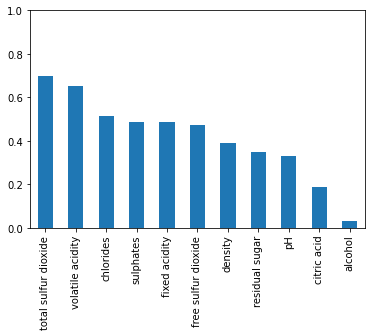

In [40]:
corr_quality.sort_values(ascending=False).plot(kind='bar')
plt.ylim(0, 1)

**TASK: Create a clustermap with seaborn to explore the relationships between variables.**

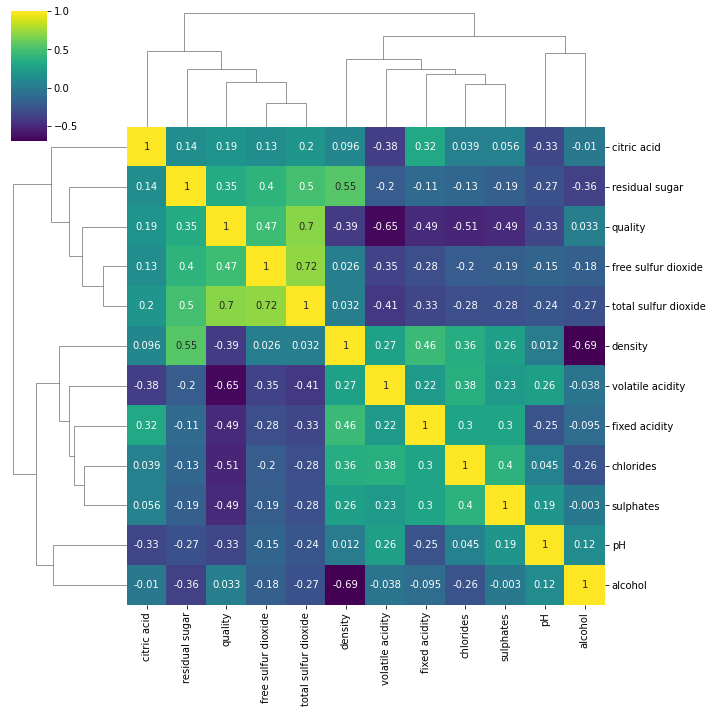

In [41]:
sns.clustermap(df.corr(), annot=True,  cmap='viridis')

----
## Machine Learning Model

**TASK: Convert the categorical column "type" from a string or "red" or "white" to dummy variables:**

In [42]:
from sklearn.preprocessing import LabelEncoder

type_label_encoder = LabelEncoder() 
df['type'] = quality_label_encoder.fit_transform(df['type'])

**TASK: Separate out the data into X features and y target label ("quality" column)**

In [43]:
X = df.drop('quality', axis=1)
y = df['quality']

**TASK: Perform a Train|Test split on the data, with a 10% test size. Note: The solution uses a random state of 101**

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Scale the X train and X test data.**

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**TASK: Create an instance of a Support Vector Machine classifier. Previously we have left this model "blank", (e.g. with no parameters). However, we already know that the classes are unbalanced, in an attempt to help alleviate this issue, we can automatically adjust weights inversely proportional to class frequencies in the input data with a argument call in the SVC() call. Check out the [documentation for SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) online and look up what the argument\parameter is.**

**TASK: Use a GridSearchCV to run a grid search for the best C and gamma parameters.**

In [46]:
param_grid = {
    "C" : [0.001, 0.01, 0.1, 0.5, 1],
    "gamma" : ["scale", "auto"],
}

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


grid_svm = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5, verbose=2)

In [49]:
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............................C=0.001, gamma=scale; total time=   5.0s
[CV] END ...............................C=0.001, gamma=scale; total time=   4.2s
[CV] END ...............................C=0.001, gamma=scale; total time=   2.8s
[CV] END ...............................C=0.001, gamma=scale; total time=   1.9s
[CV] END ...............................C=0.001, gamma=scale; total time=   1.9s
[CV] END ................................C=0.001, gamma=auto; total time=   1.9s
[CV] END ................................C=0.001, gamma=auto; total time=   1.9s
[CV] END ................................C=0.001, gamma=auto; total time=   2.0s
[CV] END ................................C=0.001, gamma=auto; total time=   1.9s
[CV] END ................................C=0.001, gamma=auto; total time=   1.9s
[CV] END ................................C=0.01, gamma=scale; total time=   0.6s
[CV] END ................................C=0.01,

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']},
             verbose=2)

In [53]:
svm = grid_svm.best_estimator_
svm

SVC(C=1, class_weight='balanced')

In [54]:
grid_svm.best_score_

0.9998289136013687

**TASK: Display the confusion matrix and classification report for your model.**

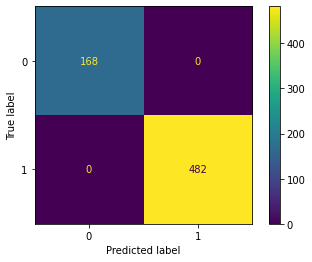

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay


ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)

In [57]:
from sklearn.metrics import classification_report


y_pred = svm.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       482

    accuracy                           1.00       650
   macro avg       1.00      1.00      1.00       650
weighted avg       1.00      1.00      1.00       650



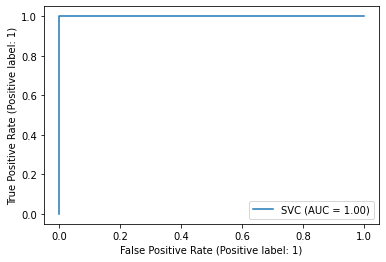

In [58]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_estimator(svm, X_test, y_test)

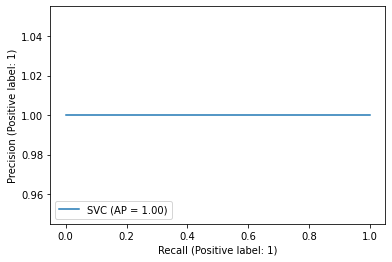

In [59]:
from sklearn.metrics import PrecisionRecallDisplay


PrecisionRecallDisplay.from_estimator(svm, X_test, y_test)

**TASK: Finally, think about how well this model performed, would you suggest using it? Realistically will this work?**